### Import Pakage

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imageio, glob, cv2
from PIL import Image
from tqdm import tqdm

from utils import CelebA_Datasets
from model import Discriminator, Generator, weights_init

import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import transforms

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### Load Datasets

In [2]:
celebA_dataset = CelebA_Datasets(data_type = 'Man')
train_loader = DataLoader(celebA_dataset, batch_size=200, shuffle=True)

### Load DCGAN

In [3]:
discriminator = Discriminator().to(device)
generator     = Generator().to(device)

weights_init(discriminator)
weights_init(generator)

### Hyper paramter Setting

In [4]:
learning_rate = 2*1e-4
d_optimizer = torch.optim.Adam(discriminator.parameters(), lr=learning_rate, betas=(.5, .5))
g_optimizer = torch.optim.Adam(generator.parameters(), lr=learning_rate, betas=(.5, .5))

epoches = 10

### Train

In [5]:
d_loss_list = [] # train
g_loss_list = [] # train

for epoch in range(epoches):
  print("----Epoch [ {}/{} ]----".format(epoches, epoch))
  
  for batch_i, image in enumerate(tqdm(train_loader)):
    batch_len = image.size()[0]

    real_label = torch.full((batch_len, 1), 1, dtype=torch.float32).to(device)
    fake_label = torch.full((batch_len, 1), 0, dtype=torch.float32).to(device)

    real_images = image.to(device)
    z = torch.randn(batch_len, 100, 1, 1).to(device)

    '''
        [train Discriminator]
    '''
    d_optimizer.zero_grad()
    g_optimizer.zero_grad()
    
    fake_images = generator(z)

    fake_loss = 1/2*torch.mean((discriminator(fake_images) - fake_label) ** 2)
    real_loss = 1/2*torch.mean((discriminator(real_images) - real_label) ** 2)
  
    d_loss = (fake_loss + real_loss) / 2

    d_loss.backward()
    d_optimizer.step()

    '''
        [train Generator]
    '''
    d_optimizer.zero_grad()
    g_optimizer.zero_grad()
    
    fake_images = generator(z)
    
    g_loss = 1/2*torch.mean((discriminator(fake_images) - real_label) ** 2)
    g_loss.backward()
    g_optimizer.step()

    d_loss_list.append(d_loss.item())
    g_loss_list.append(g_loss.item())
    
    if (batch_i + 1) % 200 == 0 or (batch_i + 1) == len(train_loader):
      print("Epoch [ {}/{} ]  Step [ {}/{} ]  d_loss : {:.5f}  g_loss : {:.5f}"\
            .format(epoches, epoch, batch_i+1, len(train_loader), d_loss.item(), g_loss.item()))
  
  if (epoch + 1) % 2 == 0:
    torch.save(generator.state_dict(), 'weights/LSGAN_generator_epoch{}.pt'.format(epoch+1))
    torch.save(discriminator.state_dict(), 'weights/LSGAN_discriminator_epoch{}.pt'.format(epoch+1))

----Epoch [ 10/0 ]----


 47%|████▋     | 200/423 [02:36<02:53,  1.29it/s]

Epoch [ 10/0 ]  Step [ 200/423 ]  d_loss : 0.11407  g_loss : 0.37071


 95%|█████████▍| 400/423 [05:12<00:18,  1.26it/s]

Epoch [ 10/0 ]  Step [ 400/423 ]  d_loss : 0.04253  g_loss : 0.37528


100%|██████████| 423/423 [05:30<00:00,  1.28it/s]


Epoch [ 10/0 ]  Step [ 423/423 ]  d_loss : 0.03729  g_loss : 0.38411
----Epoch [ 10/1 ]----


 47%|████▋     | 200/423 [02:39<03:01,  1.23it/s]

Epoch [ 10/1 ]  Step [ 200/423 ]  d_loss : 0.03425  g_loss : 0.42298


 95%|█████████▍| 400/423 [05:31<00:21,  1.09it/s]

Epoch [ 10/1 ]  Step [ 400/423 ]  d_loss : 0.03678  g_loss : 0.48206


100%|██████████| 423/423 [05:51<00:00,  1.20it/s]


Epoch [ 10/1 ]  Step [ 423/423 ]  d_loss : 0.05578  g_loss : 0.39927
----Epoch [ 10/2 ]----


 47%|████▋     | 200/423 [02:49<02:59,  1.24it/s]

Epoch [ 10/2 ]  Step [ 200/423 ]  d_loss : 0.05577  g_loss : 0.40441


 95%|█████████▍| 400/423 [05:38<00:20,  1.13it/s]

Epoch [ 10/2 ]  Step [ 400/423 ]  d_loss : 0.02628  g_loss : 0.47928


100%|██████████| 423/423 [05:58<00:00,  1.18it/s]


Epoch [ 10/2 ]  Step [ 423/423 ]  d_loss : 0.04681  g_loss : 0.47575
----Epoch [ 10/3 ]----


 47%|████▋     | 200/423 [02:38<02:58,  1.25it/s]

Epoch [ 10/3 ]  Step [ 200/423 ]  d_loss : 0.03296  g_loss : 0.37845


 95%|█████████▍| 400/423 [05:24<00:20,  1.14it/s]

Epoch [ 10/3 ]  Step [ 400/423 ]  d_loss : 0.02302  g_loss : 0.48070


100%|██████████| 423/423 [05:44<00:00,  1.23it/s]


Epoch [ 10/3 ]  Step [ 423/423 ]  d_loss : 0.05358  g_loss : 0.49308
----Epoch [ 10/4 ]----


 47%|████▋     | 200/423 [02:41<02:55,  1.27it/s]

Epoch [ 10/4 ]  Step [ 200/423 ]  d_loss : 0.07935  g_loss : 0.48428


 95%|█████████▍| 400/423 [05:21<00:19,  1.20it/s]

Epoch [ 10/4 ]  Step [ 400/423 ]  d_loss : 0.02660  g_loss : 0.48242


100%|██████████| 423/423 [05:39<00:00,  1.24it/s]


Epoch [ 10/4 ]  Step [ 423/423 ]  d_loss : 0.11717  g_loss : 0.48729
----Epoch [ 10/5 ]----


 47%|████▋     | 200/423 [02:30<02:47,  1.33it/s]

Epoch [ 10/5 ]  Step [ 200/423 ]  d_loss : 0.02950  g_loss : 0.45912


 95%|█████████▍| 400/423 [05:10<00:17,  1.30it/s]

Epoch [ 10/5 ]  Step [ 400/423 ]  d_loss : 0.12042  g_loss : 0.19120


100%|██████████| 423/423 [05:27<00:00,  1.29it/s]


Epoch [ 10/5 ]  Step [ 423/423 ]  d_loss : 0.02203  g_loss : 0.25344
----Epoch [ 10/6 ]----


 47%|████▋     | 200/423 [02:24<02:38,  1.41it/s]

Epoch [ 10/6 ]  Step [ 200/423 ]  d_loss : 0.03433  g_loss : 0.41567


 95%|█████████▍| 400/423 [04:48<00:16,  1.38it/s]

Epoch [ 10/6 ]  Step [ 400/423 ]  d_loss : 0.06367  g_loss : 0.32562


100%|██████████| 423/423 [05:04<00:00,  1.39it/s]


Epoch [ 10/6 ]  Step [ 423/423 ]  d_loss : 0.12359  g_loss : 0.43854
----Epoch [ 10/7 ]----


 47%|████▋     | 200/423 [02:25<02:38,  1.40it/s]

Epoch [ 10/7 ]  Step [ 200/423 ]  d_loss : 0.03632  g_loss : 0.32707


 95%|█████████▍| 400/423 [04:56<00:17,  1.31it/s]

Epoch [ 10/7 ]  Step [ 400/423 ]  d_loss : 0.05793  g_loss : 0.47954


100%|██████████| 423/423 [05:14<00:00,  1.35it/s]


Epoch [ 10/7 ]  Step [ 423/423 ]  d_loss : 0.06954  g_loss : 0.32494
----Epoch [ 10/8 ]----


 47%|████▋     | 200/423 [02:26<02:43,  1.36it/s]

Epoch [ 10/8 ]  Step [ 200/423 ]  d_loss : 0.03314  g_loss : 0.30278


 95%|█████████▍| 400/423 [04:49<00:17,  1.35it/s]

Epoch [ 10/8 ]  Step [ 400/423 ]  d_loss : 0.11778  g_loss : 0.42755


100%|██████████| 423/423 [05:07<00:00,  1.38it/s]


Epoch [ 10/8 ]  Step [ 423/423 ]  d_loss : 0.08015  g_loss : 0.36690
----Epoch [ 10/9 ]----


 47%|████▋     | 200/423 [02:28<02:45,  1.35it/s]

Epoch [ 10/9 ]  Step [ 200/423 ]  d_loss : 0.05049  g_loss : 0.34275


 95%|█████████▍| 400/423 [04:57<00:16,  1.35it/s]

Epoch [ 10/9 ]  Step [ 400/423 ]  d_loss : 0.04435  g_loss : 0.44290


100%|██████████| 423/423 [05:15<00:00,  1.34it/s]


Epoch [ 10/9 ]  Step [ 423/423 ]  d_loss : 0.01784  g_loss : 0.43618


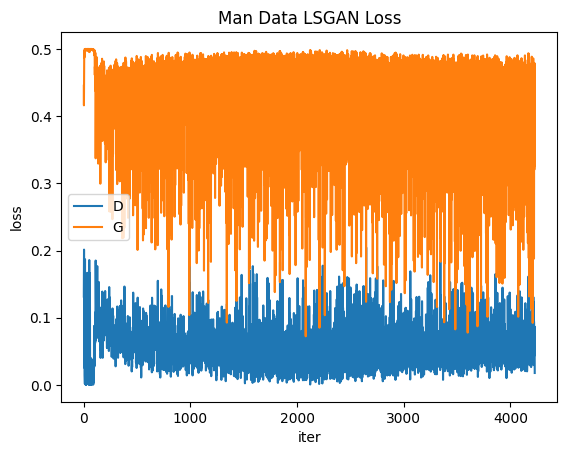

In [6]:
plt.title("Man Data LSGAN Loss")
plt.xlabel('iter')
plt.ylabel('loss')
plt.plot(d_loss_list)
plt.plot(g_loss_list)
plt.legend(['D', 'G'])
plt.savefig('result/Man.png')
plt.show()

### Inference (Epoch = 1, 5, 10)

In [4]:
unnormalize = transforms.Normalize((-0.5 / 0.5, -0.5 / 0.5, -0.5 / 0.5), (1.0 / 0.5, 1.0 / 0.5, 1.0 / 0.5))
fixed_z = torch.randn(16, 100, 1, 1).to(device)

In [22]:
frame = torch.zeros(3, 256, 256)

model_path = 'weights/LSGAN_generator_epoch10.pt'

generator = Generator().to(device)
generator.load_state_dict(torch.load(model_path))

fixed_fake_images = generator(fixed_z)
fixed_fake_images = fixed_fake_images.detach().to('cpu')
fixed_fake_images = unnormalize(fixed_fake_images)

cnt = 0
for r in range(4):
    for c in range(4):
        frame[:,r*64:(r+1)*64, c*64:(c+1)*64] = fixed_fake_images[cnt]
        cnt+=1

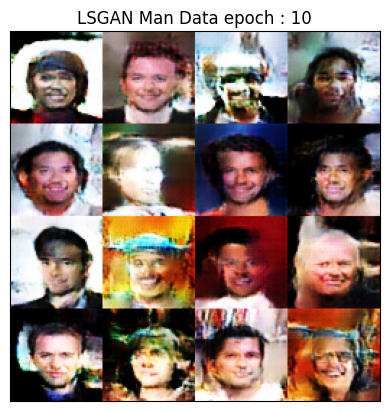

In [23]:
plt.imshow(frame.permute(1,2,0))
plt.title('LSGAN Man Data epoch : {}'.format(10))
plt.xticks([])
plt.yticks([])
plt.savefig('./result/LSGAN_generator_epoch9.png')
plt.show()

In [24]:
im = [Image.open(i) for i in glob.glob('result/LSGAN*.png')]
im[0].save('result/LSGAN_man.gif', save_all=True, append_images=im[1:],loop=0xff, duration=1000)